# Contents

## 01. Import libraries and Data
## 02. Review dataframe
## 03. Create numerical version of album and add to song_info
## 04. Create aggregate for state google search score and add to song_info
## 05. Export df

# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Import gsearch_st dataframe

df = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'gsearch_st_wrangled.csv'), index_col = 0)

## 02. Review dataframe

In [4]:
df.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search,wk1_alb_sales,streams_normal
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127


In [5]:
df.shape

(3672, 16)

In [6]:
df['g_search_score'].value_counts(dropna=False)

g_search_score
53    94
57    93
66    92
62    91
63    91
      ..
3      5
99     5
97     4
5      3
2      2
Name: count, Length: 100, dtype: int64

# 03. Create numerical version of album and add to song_info


This will help identify correlations in search scores and which album is being released. This could also track popularity over time. 

In [7]:
# Create for loop for album_number, using album_ids due to use of deluxe/longest versions of albums

alb_num = []

for value in df['album_id']:
    if value == "1989":
        alb_num.append(5)
    elif value == "DEBUT":
        alb_num.append(1)
    elif value == "REP":
        alb_num.append(6)
    elif value == "FEAR":
        alb_num.append(2)
    elif value == "LOVE":
        alb_num.append(7)
    elif value == "SPEAK":
        alb_num.append(3)
    elif value == "RED":
        alb_num.append(4)
    elif value == "FOLK":
        alb_num.append(8)
    elif value == "EVER":
        alb_num.append(9)
    elif value == "FEARTV":
        alb_num.append(10)
    elif value == "REDTV":
        alb_num.append(11)
    elif value == "MIDN":
        alb_num.append(12)
    elif value == "SPEAKTV":
        alb_num.append(13)
    elif value == "1989TV":
        alb_num.append(14)
    else:
        alb_num.append("unknown")

In [8]:
df['alb_num'] = alb_num

In [9]:
df.shape

(3672, 17)

In [10]:
df.head()

,period_state,period,period_start_date,state,g_search_score,album_event,album_id,album_release_date,album_release_day,periods_from_release,us_search_avg,us_peak_search,global_search_avg,global_peak_search,wk1_alb_sales,streams_normal,alb_num
0,"2006/09/28-2006/10/10, Alabama",2006/09/28-2006/10/10,2006-09-28,Alabama,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
1,"2006/09/28-2006/10/10, Alaska",2006/09/28-2006/10/10,2006-09-28,Alaska,0,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
2,"2006/09/28-2006/10/10, Arizona",2006/09/28-2006/10/10,2006-09-28,Arizona,8,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
3,"2006/09/28-2006/10/10, Arkansas",2006/09/28-2006/10/10,2006-09-28,Arkansas,46,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1
4,"2006/09/28-2006/10/10, California",2006/09/28-2006/10/10,2006-09-28,California,3,Debut,DEBUT,2006-10-24,Tuesday,-2,69,2006-10-08,69,2006-10-07,39000,187127,1


In [11]:
df['alb_num'].value_counts(dropna=False)

alb_num
12    408
1     255
3     255
5     255
6     255
13    255
9     255
10    255
8     255
7     255
11    255
4     255
2     255
14    204
Name: count, dtype: int64

In [14]:
df.dtypes

period_state            object
period                  object
period_start_date       object
state                   object
g_search_score           int64
album_event             object
album_id                object
album_release_date      object
album_release_day       object
periods_from_release     int64
us_search_avg            int64
us_peak_search          object
global_search_avg        int64
global_peak_search      object
wk1_alb_sales            int64
streams_normal           int64
alb_num                  int64
dtype: object

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='alb_num', ylabel='g_search_score'>

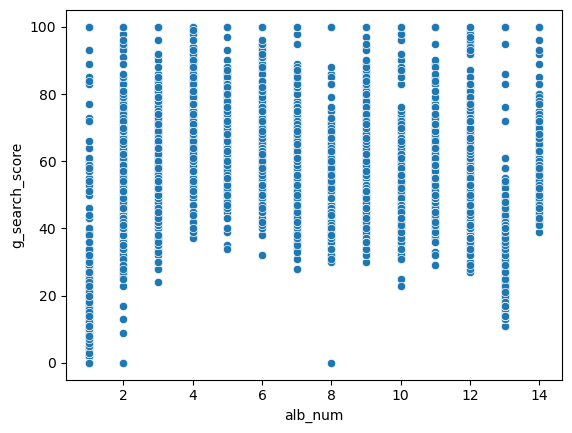

In [13]:
sns.scatterplot(x= 'alb_num', y= 'g_search_score', data=df)

In [29]:
df.groupby('album_id').agg({'g_search_score':['min', 'median', 'mean', 'max']})

g_search_score                       
                    min median       mean  max
album_id                                      
1989                 34   67.0  67.925490  100
1989TV               39   58.5  60.352941  100
DEBUT                 0   12.0  19.462745  100
EVER                 30   57.0  58.356863  100
FEAR                  0   58.0  57.650980  100
FEARTV               23   54.0  56.517647  100
FOLK                  0   51.0  52.427451  100
LOVE                 28   60.0  60.639216  100
MIDN                 27   55.0  56.816176  100
RED                  37   65.0  67.203922  100
REDTV                29   57.0  57.854902  100
REP                  32   63.0  65.317647  100
SPEAK                24   59.0  60.160784  100
SPEAKTV              11   23.0  29.160784  100

In [33]:
df_num = df.select_dtypes(include='number')

In [34]:
df_num.columns

Index(['g_search_score', 'periods_from_release', 'us_search_avg',
       'global_search_avg', 'wk1_alb_sales', 'streams_normal', 'alb_num'],
      dtype='object')

In [36]:
df_num.corr()

,g_search_score,periods_from_release,us_search_avg,global_search_avg,wk1_alb_sales,streams_normal,alb_num
g_search_score,1.000000,0.022850,0.030386,0.093735,0.386352,0.046170,0.013808
periods_from_release,0.022850,1.000000,0.190397,0.264677,-0.116314,-0.101836,-0.142645
us_search_avg,0.030386,0.190397,1.000000,0.929980,-0.048847,-0.141922,-0.249870
global_search_avg,0.093735,0.264677,0.929980,1.000000,-0.006986,-0.124465,-0.285503
wk1_alb_sales,0.386352,-0.116314,-0.048847,-0.006986,1.000000,0.368892,0.056431
streams_normal,0.046170,-0.101836,-0.141922,-0.124465,0.368892,1.000000,0.543110
alb_num,0.013808,-0.142645,-0.249870,-0.285503,0.056431,0.543110,1.000000


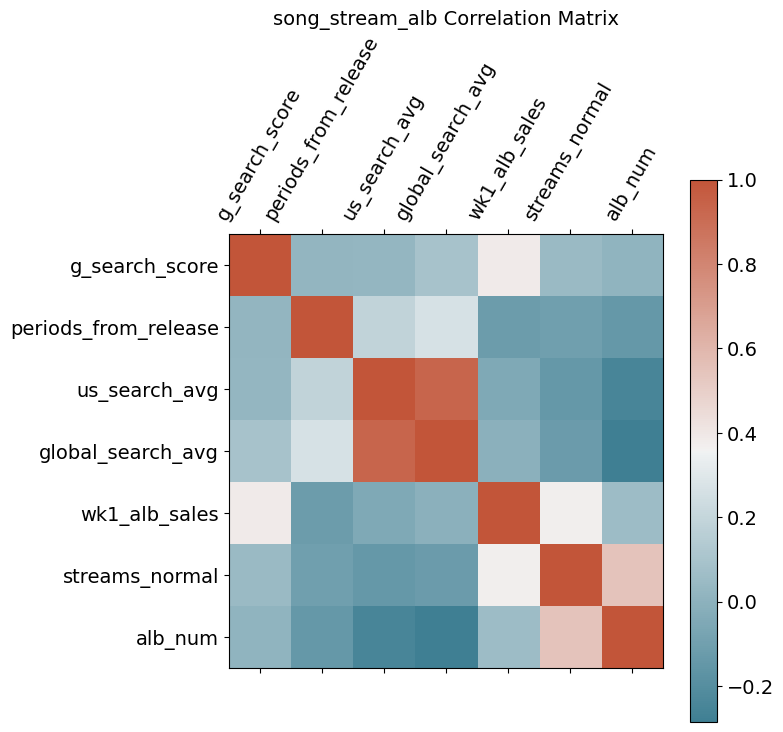

In [39]:
# Add formatting and increase clarity of the heatmap

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(df_num.corr(), fignum=f.number, cmap=cmap) # type of plot
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=60) # x axis labels
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend
cb.ax.tick_params(labelsize=14) 
plt.title('song_stream_alb Correlation Matrix', fontsize=14)

plt.show()

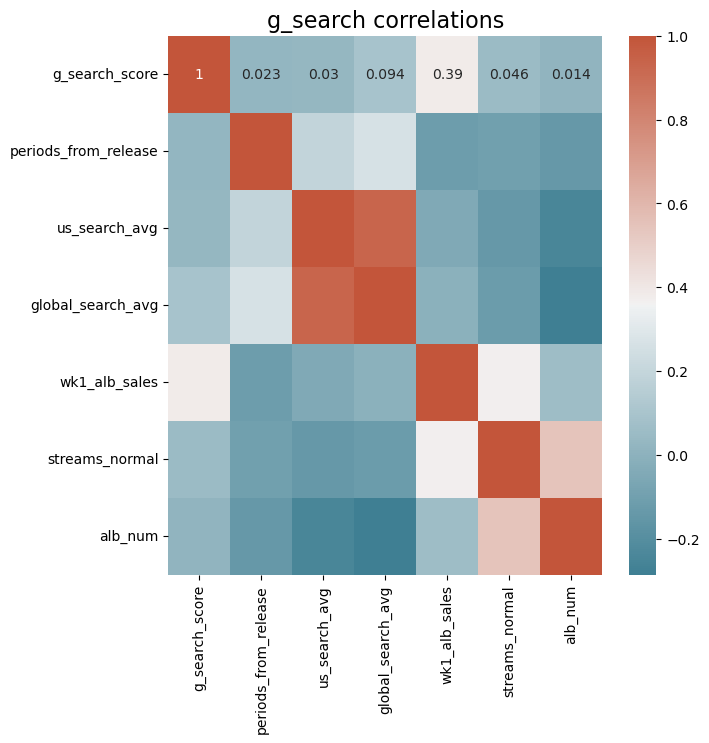

In [40]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(7,7))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_num.corr(), annot = True, cmap=cmap, ax = ax) # The `annot` argument allows the plot to 
plt.title('g_search correlations', fontsize=16)
cb.ax.tick_params(labelsize=14) #place the correlation coefficients onto the heatmap.

plt.show()

In [41]:
df_num.columns

Index(['g_search_score', 'periods_from_release', 'us_search_avg',
       'global_search_avg', 'wk1_alb_sales', 'streams_normal', 'alb_num'],
      dtype='object')

In [44]:
alb_number_sub = df_num[['alb_num','g_search_score', 'us_search_avg',
                         'global_search_avg', 'wk1_alb_sales', 'streams_normal']]

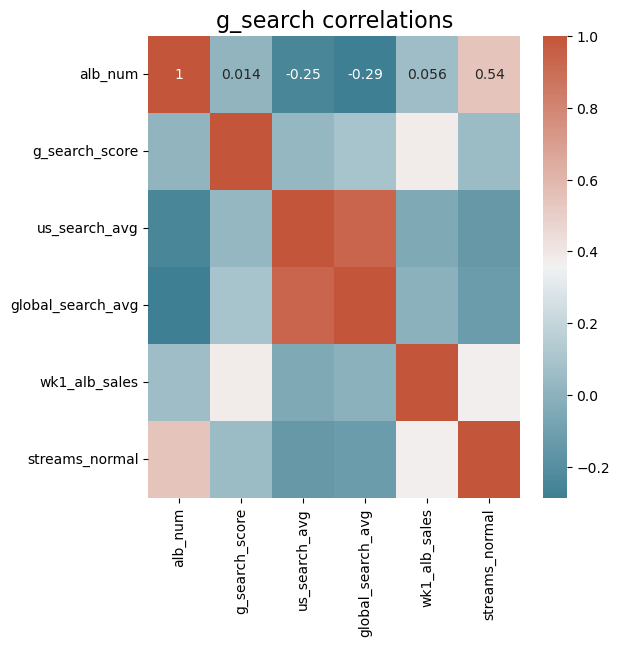

In [45]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(6,6))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(alb_number_sub.corr(), annot = True, cmap=cmap, ax = ax) # The `annot` argument allows the plot to 
plt.title('g_search correlations', fontsize=16)
cb.ax.tick_params(labelsize=14) #place the correlation coefficients onto the heatmap.

plt.show()

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='alb_num', ylabel='streams_normal'>

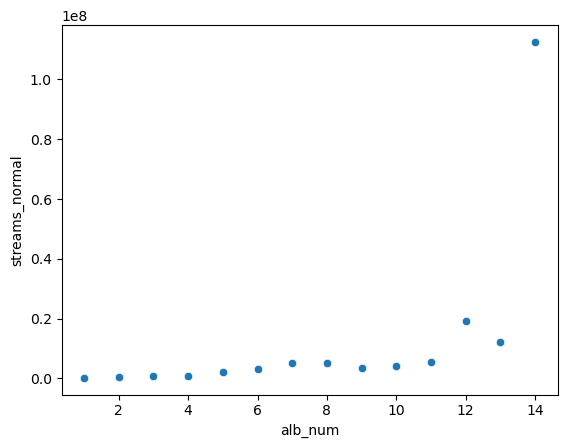

In [49]:
sns.scatterplot(x='alb_num', y = 'streams_normal', data= df_num)

In [46]:
periods_from_release = df_num[['periods_from_release', 'g_search_score', 'us_search_avg', 'global_search_avg']]

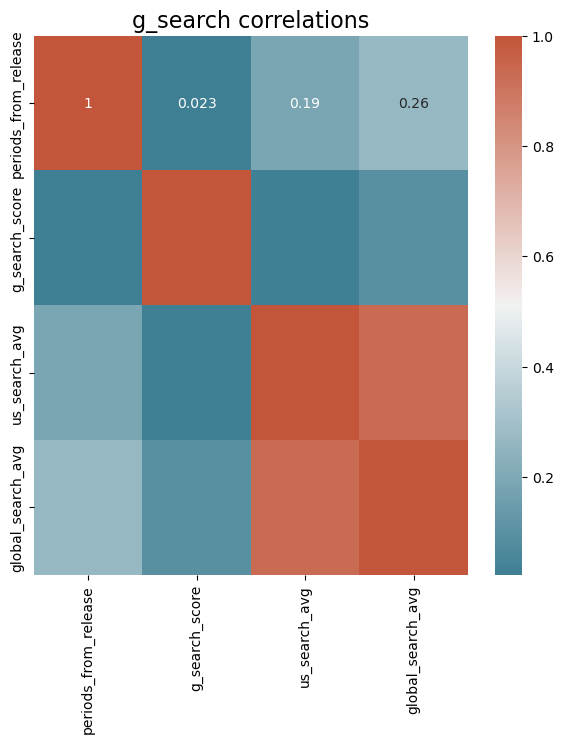

In [47]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(7,7))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(periods_from_release.corr(), annot = True, cmap=cmap, ax = ax) # The `annot` argument allows the plot to 
plt.title('g_search correlations', fontsize=16)
cb.ax.tick_params(labelsize=14) #place the correlation coefficients onto the heatmap.

plt.show()

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Axes: xlabel='periods_from_release', ylabel='global_search_avg'>

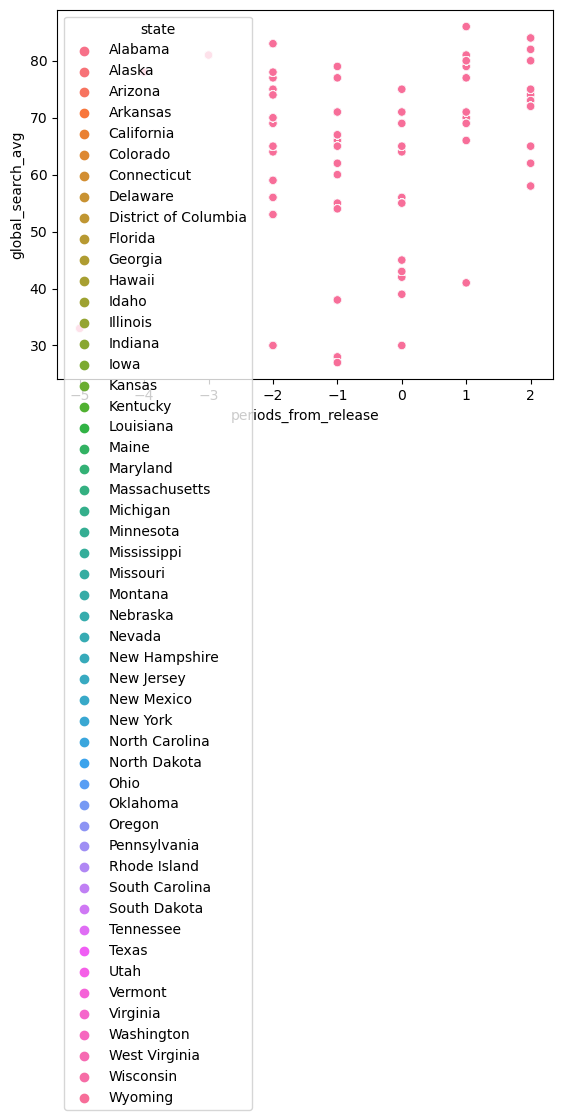

In [54]:
sns.scatterplot(x='periods_from_release', y = 'global_search_avg', hue='state', data= df)

In [50]:
streams_sub = periods_from_release = df_num[['streams_normal', 'g_search_score', 'us_search_avg',
       'global_search_avg']]

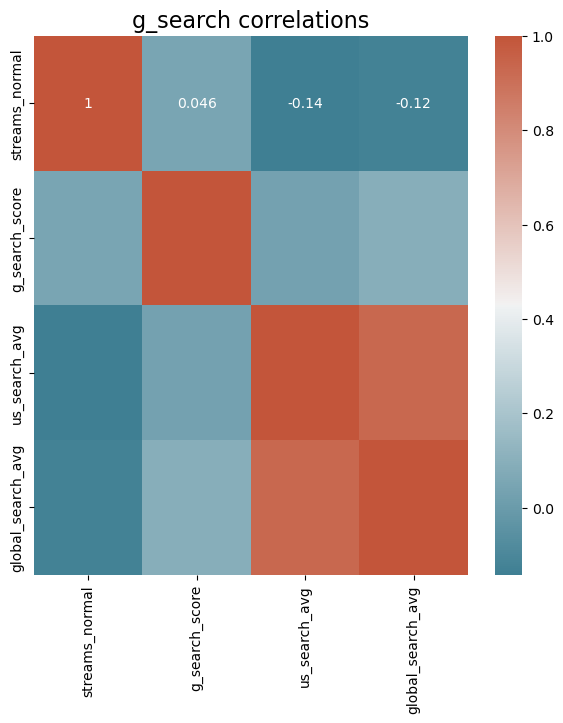

In [51]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(7,7))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(streams_sub.corr(), annot = True, cmap=cmap, ax = ax) # The `annot` argument allows the plot to 
plt.title('g_search correlations', fontsize=16)
cb.ax.tick_params(labelsize=14) #place the correlation coefficients onto the heatmap.

plt.show()

C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leobs\anaconda3\envs\Leoenvironment\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

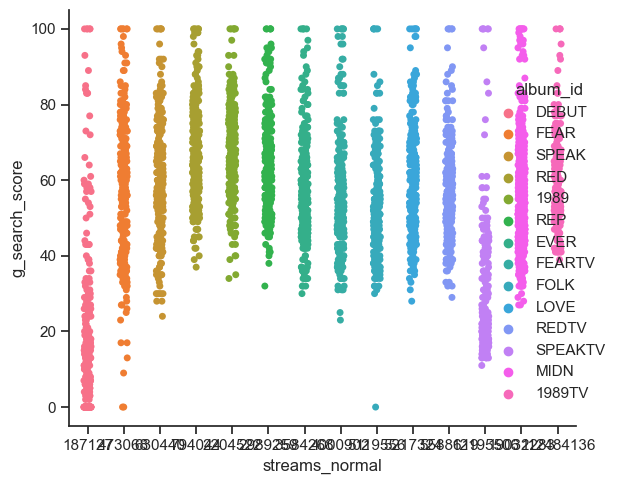

In [57]:
sns.set(style="ticks")
g = sns.catplot(x="streams_normal", y="g_search_score", hue="album_id", data=df)
plt.tight_layout()

In [59]:
release_date_sub = df_num[['release_day','g_search_score', 'us_search_avg',
       'global_search_avg']]

KeyError: "['release_day'] not in index"

In [12]:
df['period_start_date'].value_counts(dropna=False)

period_start_date
2023-07-07    52
2006-09-28    51
2020-06-28    51
2019-08-10    51
2019-07-28    51
              ..
2022-09-21    51
2022-09-08    51
2022-08-26    51
2023-11-09    51
2023-07-20    50
Name: count, Length: 72, dtype: int64

In [ ]:
# Aggregate state google search score for each time period

# 05. Export dfs

# Export new album sales df with aggregates 

ddd  = pd.read_csv(os.path.join(path,'02 Manipulated Data', '.csv'), index_col = 0)